In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import kagglehub
import joblib
import matplotlib.pyplot as plt


In [2]:
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-approval-prediction-dataset


In [3]:
pathDF = "/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv"
df = pd.read_csv(pathDF)
df


loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.corr(numeric_only=True)

loan_id  no_of_dependents  income_annum  \
loan_id                   1.000000          0.005326      0.012592   
no_of_dependents          0.005326          1.000000      0.007266   
income_annum              0.012592          0.007266      1.000000   
loan_amount               0.008170         -0.003366      0.927470   
loan_term                 0.009809         -0.020111      0.011488   
cibil_score               0.016323         -0.009998     -0.023034   
residential_assets_value  0.020936          0.007376      0.636841   
commercial_assets_value   0.018595         -0.001531      0.640328   
luxury_assets_value      -0.000862          0.002817      0.929145   
bank_asset_value          0.010765          0.011163      0.851093   

                          loan_amount  loan_term  cibil_score  \
loan_id                      0.008170   0.009809     0.016323   
no_of_dependents            -0.003366  -0.020111    -0.009998   
income_annum                 0.927470   0.011488    -0.023034   
loan_amount                  1.000000   0.008437    -0.017035   
loan_term                    0.008437   1.000000     0.007810   
cibil_score                 -0.017035   0.007810     1.000000   
residential_assets_value     0.594596   0.008016    -0.019947   
commercial_assets_value      0.603188  -0.005478    -0.003769   
luxury_assets_value          0.860914   0.012490    -0.028618   
bank_asset_value             0.788122   0.017177    -0.015478   

                          residential_assets_value  commercial_assets_value  \
loan_id                                   0.020936                 0.018595   
no_of_dependents                          0.007376                -0.001531   
income_annum                              0.636841                 0.640328   
loan_amount                               0.594596                 0.603188   
loan_term                                 0.008016                -0.005478   
cibil_score                              -0.019947                -0.003769   
residential_assets_value                  1.000000                 0.414786   
commercial_assets_value                   0.414786                 1.000000   
luxury_assets_value                       0.590932                 0.591128   
bank_asset_value                          0.527418                 0.548576   

                          luxury_assets_value  bank_asset_value  
loan_id                             -0.000862          0.010765  
no_of_dependents                     0.002817          0.011163  
income_annum                         0.929145          0.851093  
loan_amount                          0.860914          0.788122  
loan_term                            0.012490          0.017177  
cibil_score                         -0.028618         -0.015478  
residential_assets_value             0.590932          0.527418  
commercial_assets_value              0.591128          0.548576  
luxury_assets_value                  1.000000          0.788517  
bank_asset_value                     0.788517          1.000000

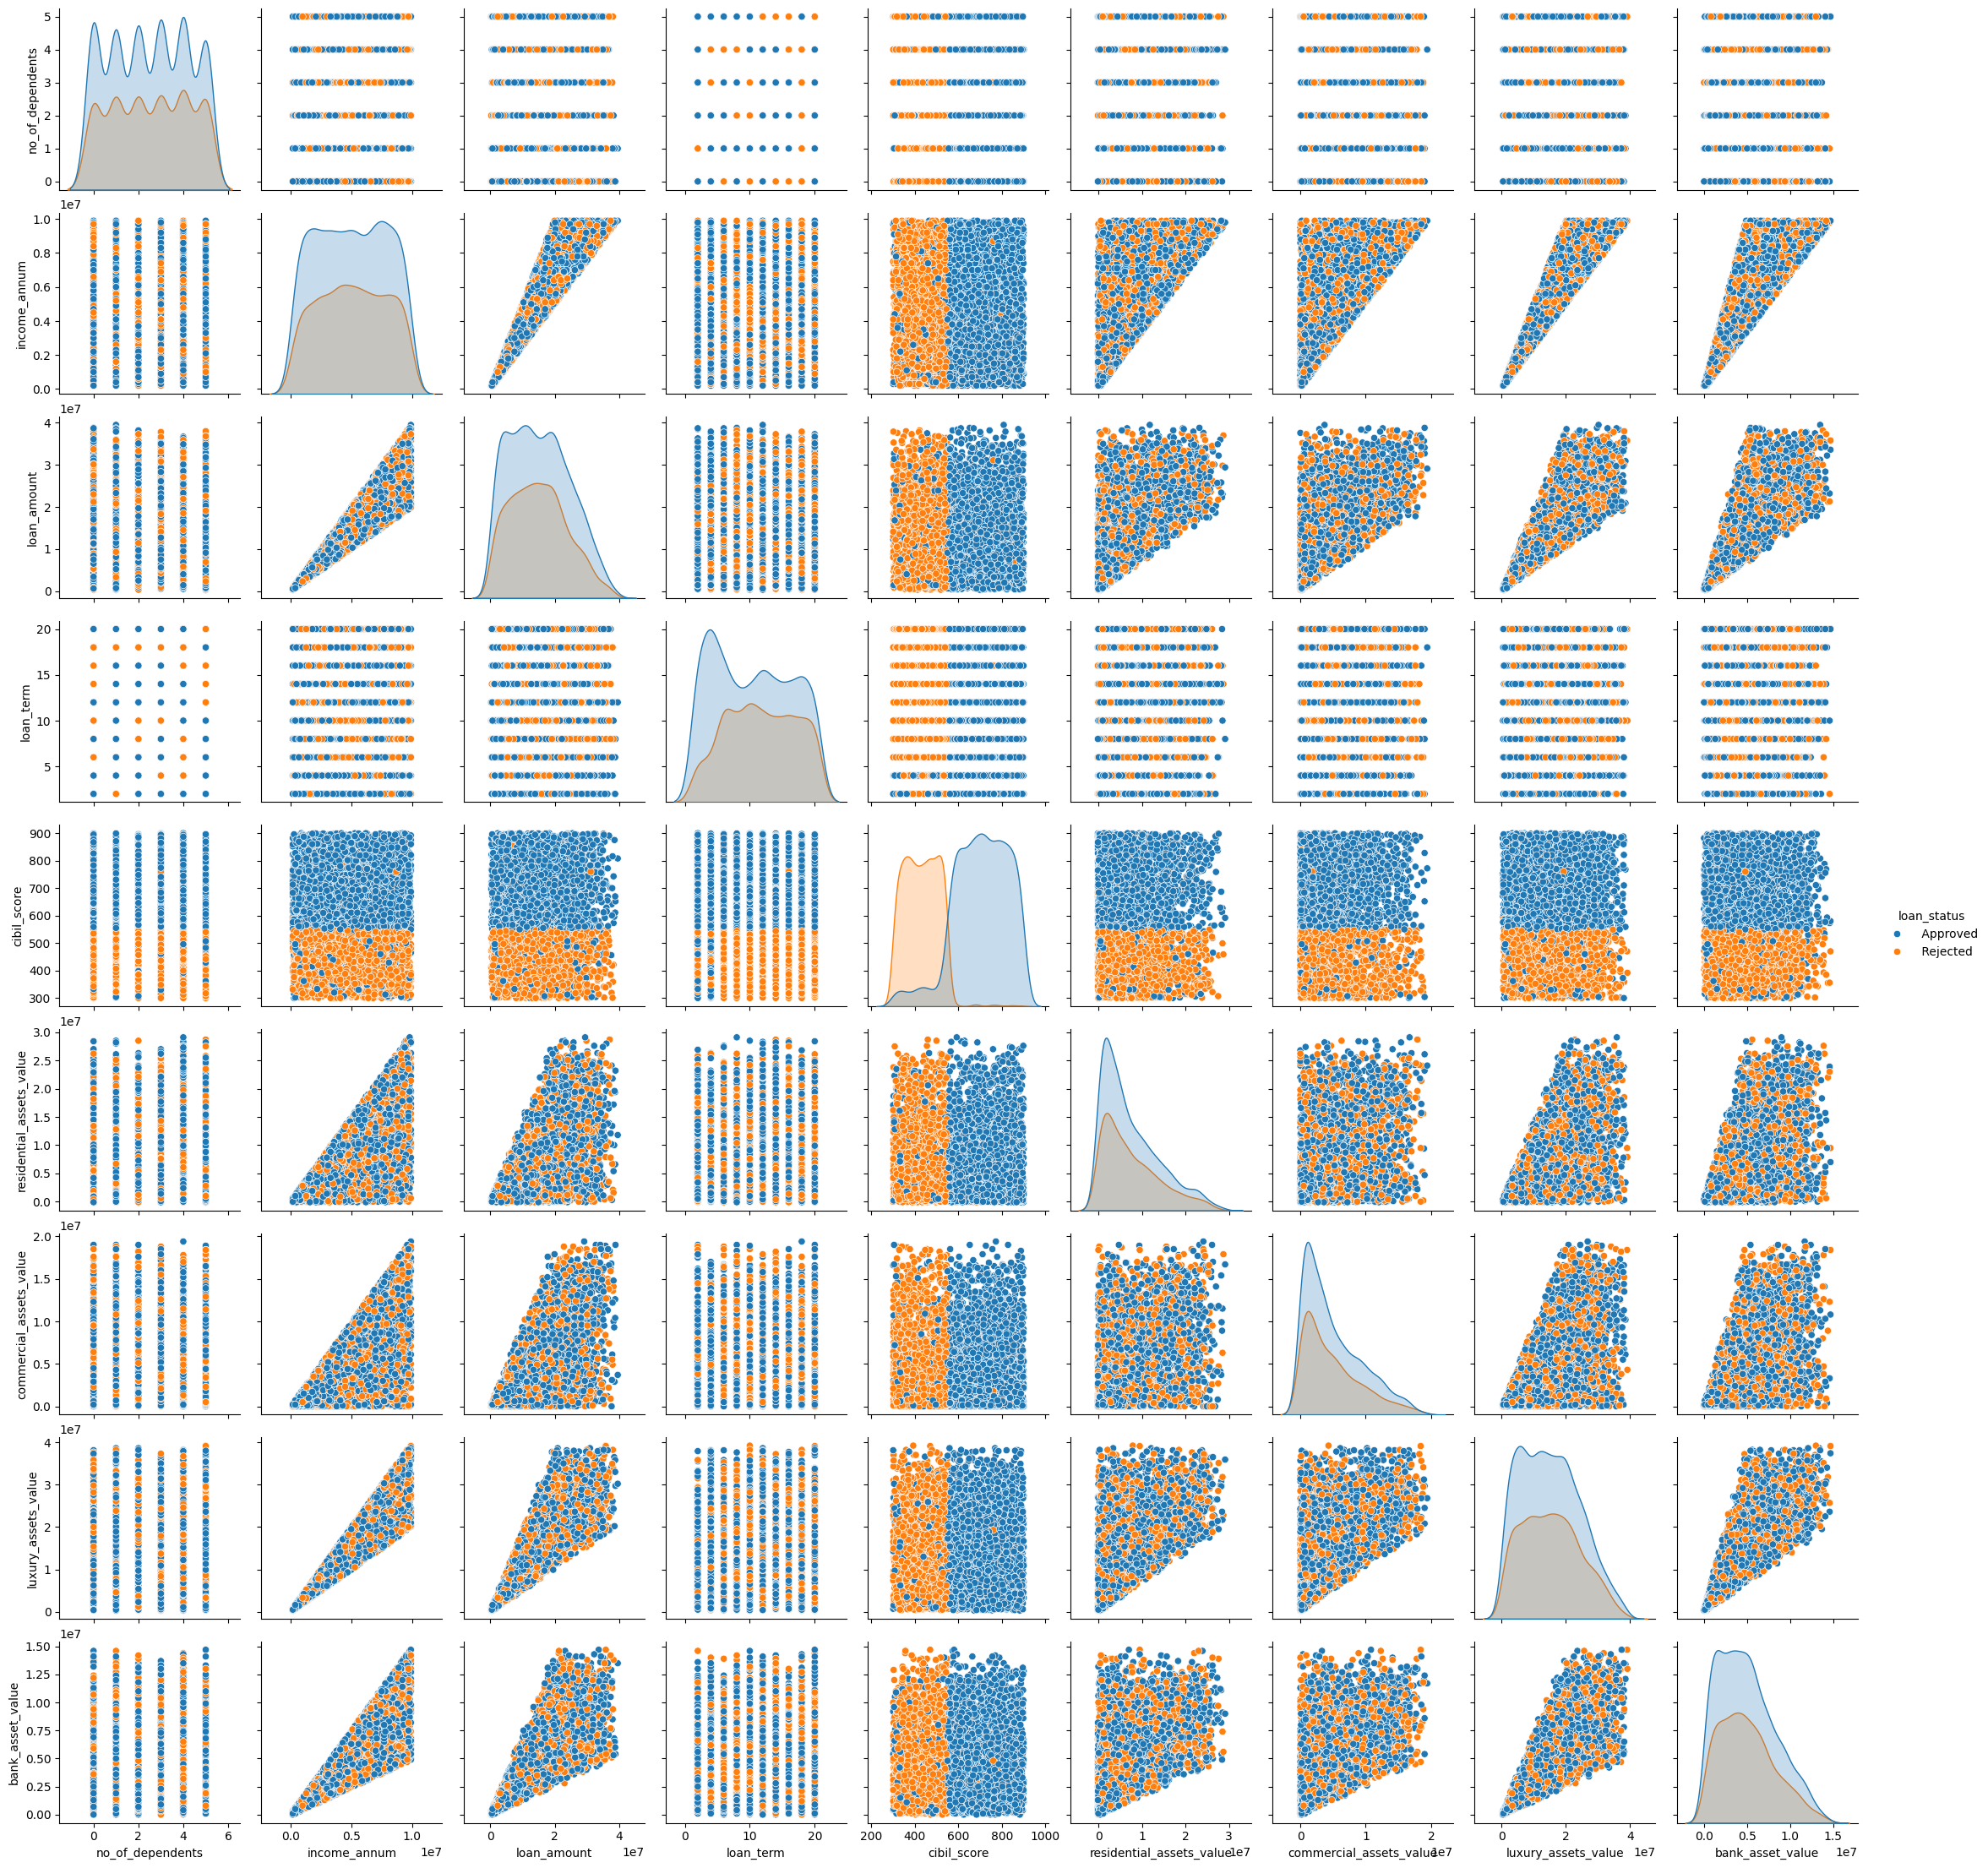

In [21]:
sns.pairplot(df.drop(['loan_id'], axis = 1), hue = 'loan_status')

In [8]:
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

	loan_id: 0
	no_of_dependents: 0
	education: 0
	self_employed: 0
	income_annum: 0
	loan_amount: 0
	loan_term: 0
	cibil_score: 0
	residential_assets_value: 0
	commercial_assets_value: 0
	luxury_assets_value: 0
	bank_asset_value: 0
	loan_status: 0


In [9]:
print(df.dtypes)

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object


In [50]:
numeric_features = ['no_of_dependents', 'income_annum','loan_amount','loan_term','cibil_score','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
categorical_features = ['education','self_employed']

onehot_pipeline = Pipeline([
        ('onehot_encoder', OneHotEncoder(
            handle_unknown='ignore',
            sparse_output=False,
        ))
    ])

numeric_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

preprocessor = ColumnTransformer([
        ('cat', onehot_pipeline, categorical_features),
        ('num', numeric_pipeline, numeric_features)
    ])


In [11]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [51]:
X = df.drop(['loan_status', 'loan_id'], axis = 1)
y = df['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.2, random_state=42, stratify=y)

preprocessor.fit(X_train, y_train)

X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)



In [13]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [14]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [15]:
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(3415, 13)
(854, 13)


In [16]:

param_grid = {
   'kernel': ['rbf','linear'],
    'C': [0.1, 1, 10],
    'gamma': ['auto', 'scale'],
   'class_weight': ['balanced']
}
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train_encoded, y_train_encoded)
print(f"Best SVC model is: {grid_search.best_estimator_}")
print(f"Best SVC model score is: {grid_search.best_score_}")
best_svc = grid_search.best_estimator_


Best SVC model is: SVC(C=10, class_weight='balanced', gamma='auto')
Best SVC model score is: 0.9434846266471449


In [ ]:
param_grid= {
    'loss': ['hinge', 'log_loss', 'modified_huber','squared_error'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
}
sgd_clf_cv = GridSearchCV(SGDClassifier(random_state= 42,max_iter= 100000),param_grid, cv = 3)
sgd_clf_cv.fit(X_train_encoded, y_train_encoded)
print(f"Best SGD model is: {sgd_clf_cv.best_estimator_}")
print(f"Best SGD model score is: {sgd_clf_cv.best_score_}")
best_sgd = sgd_clf_cv.best_estimator_


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [29]:
param_grid= {
    'alpha': [0.0001, 0.001, 0.01, .1],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'class_weight': ['balanced']
}
ridge_clf_cv = GridSearchCV(RidgeClassifier(),param_grid, cv = 3)
ridge_clf_cv.fit(X_train_encoded, y_train_encoded)
print(f"Best Ridge model is: {ridge_clf_cv.best_estimator_}")
print(f"Best Ridge model score is: {ridge_clf_cv.best_score_}")
best_ridge = ridge_clf_cv.best_estimator_


Best Ridge model is: RidgeClassifier(alpha=0.0001, class_weight='balanced')
Best Ridge model score is: 0.9136144975525556


0.9461358313817331

In [30]:
param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

dt_clf_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
dt_clf_cv.fit(X_train_encoded, y_train_encoded)
print(f"Best Decision Tree model is: {dt_clf_cv.best_estimator_}")
print(f"Best Decision Tree model score is: {dt_clf_cv.best_score_}")
best_dt = dt_clf_cv.best_estimator_

Best Decision Tree model is: DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5)
Best Decision Tree model score is: 0.9786237188872621


0.9730679156908665

In [36]:
print(best_dt.feature_importances_.shape)
print(X_train.columns.shape)

(13,)
(11,)


In [41]:
importances = pd.Series(best_dt.feature_importances_, index = preprocessor.get_feature_names_out())

print(importances.sort_values(ascending = False))

num__cibil_score                 0.859137
num__loan_term                   0.050343
num__loan_amount                 0.037968
num__income_annum                0.016127
num__luxury_assets_value         0.010651
num__residential_assets_value    0.009071
num__no_of_dependents            0.006112
num__commercial_assets_value     0.005973
cat__self_employed_ Yes          0.001844
num__bank_asset_value            0.001532
cat__education_ Not Graduate     0.000912
cat__education_ Graduate         0.000328
cat__self_employed_ No           0.000000
dtype: float64


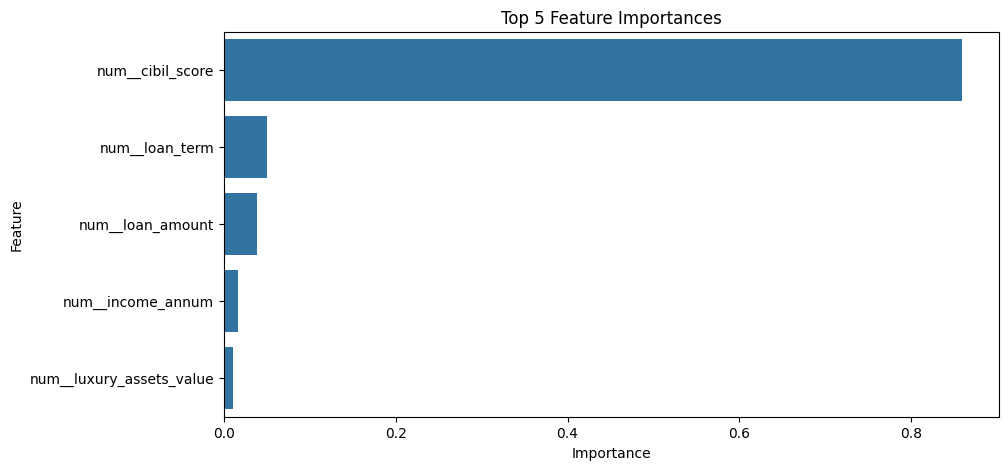

In [45]:
top_features = importances.sort_values(ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 5 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
joblib.dump(best_dt, 'best_decistion_tree')